In [1]:
# numpy : to deal with array
import numpy as np
#pandas : to deal with data(read,EDA,....)
import pandas as pd
#matplotlib.pyplot,seaborn : to draw
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn.metrics: to evaluate the model and compare between the difference models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#MinMaxScaler: make the data between min and max that you choose them(for scaler the data)
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
#train_test_split to divide the data into test ,train and validation,KFold to make cross validation
#cross_val_score to calculate the score of val part
#GridSearchCV to search about best value to hyperpharemeter
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
#classification_report to calcalute different messaures of classification ( recall ,f1_score,......)
from sklearn.metrics import classification_report
#svc to make support vector classifier
from sklearn.svm import SVC
# MLPClassifier to make classifaciation by using neural_network 
from sklearn.neural_network import MLPClassifier
#Sequential : to make layer Sequential
from tensorflow.keras.models import Sequential
#Dense,Dropout,Input are differents layer
from tensorflow.keras.layers import Dense, Dropout,Input
# Adam: is a solver to find the weights
from tensorflow.keras.optimizers import Adam
#SparseCategoricalCrossentropy to calculate the accuracy for multipule classification to moniter rhe model in neural_network 
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
# read the data and preprocess it
data=pd.read_csv('C:/Users/El_manfy/Downloads/archive (1)/WineQT.csv')

In [3]:
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

In [4]:
# we will explore the data. we will see missing values ,duplication ,consistency,....
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [7]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


<Figure size 3000x3000 with 0 Axes>

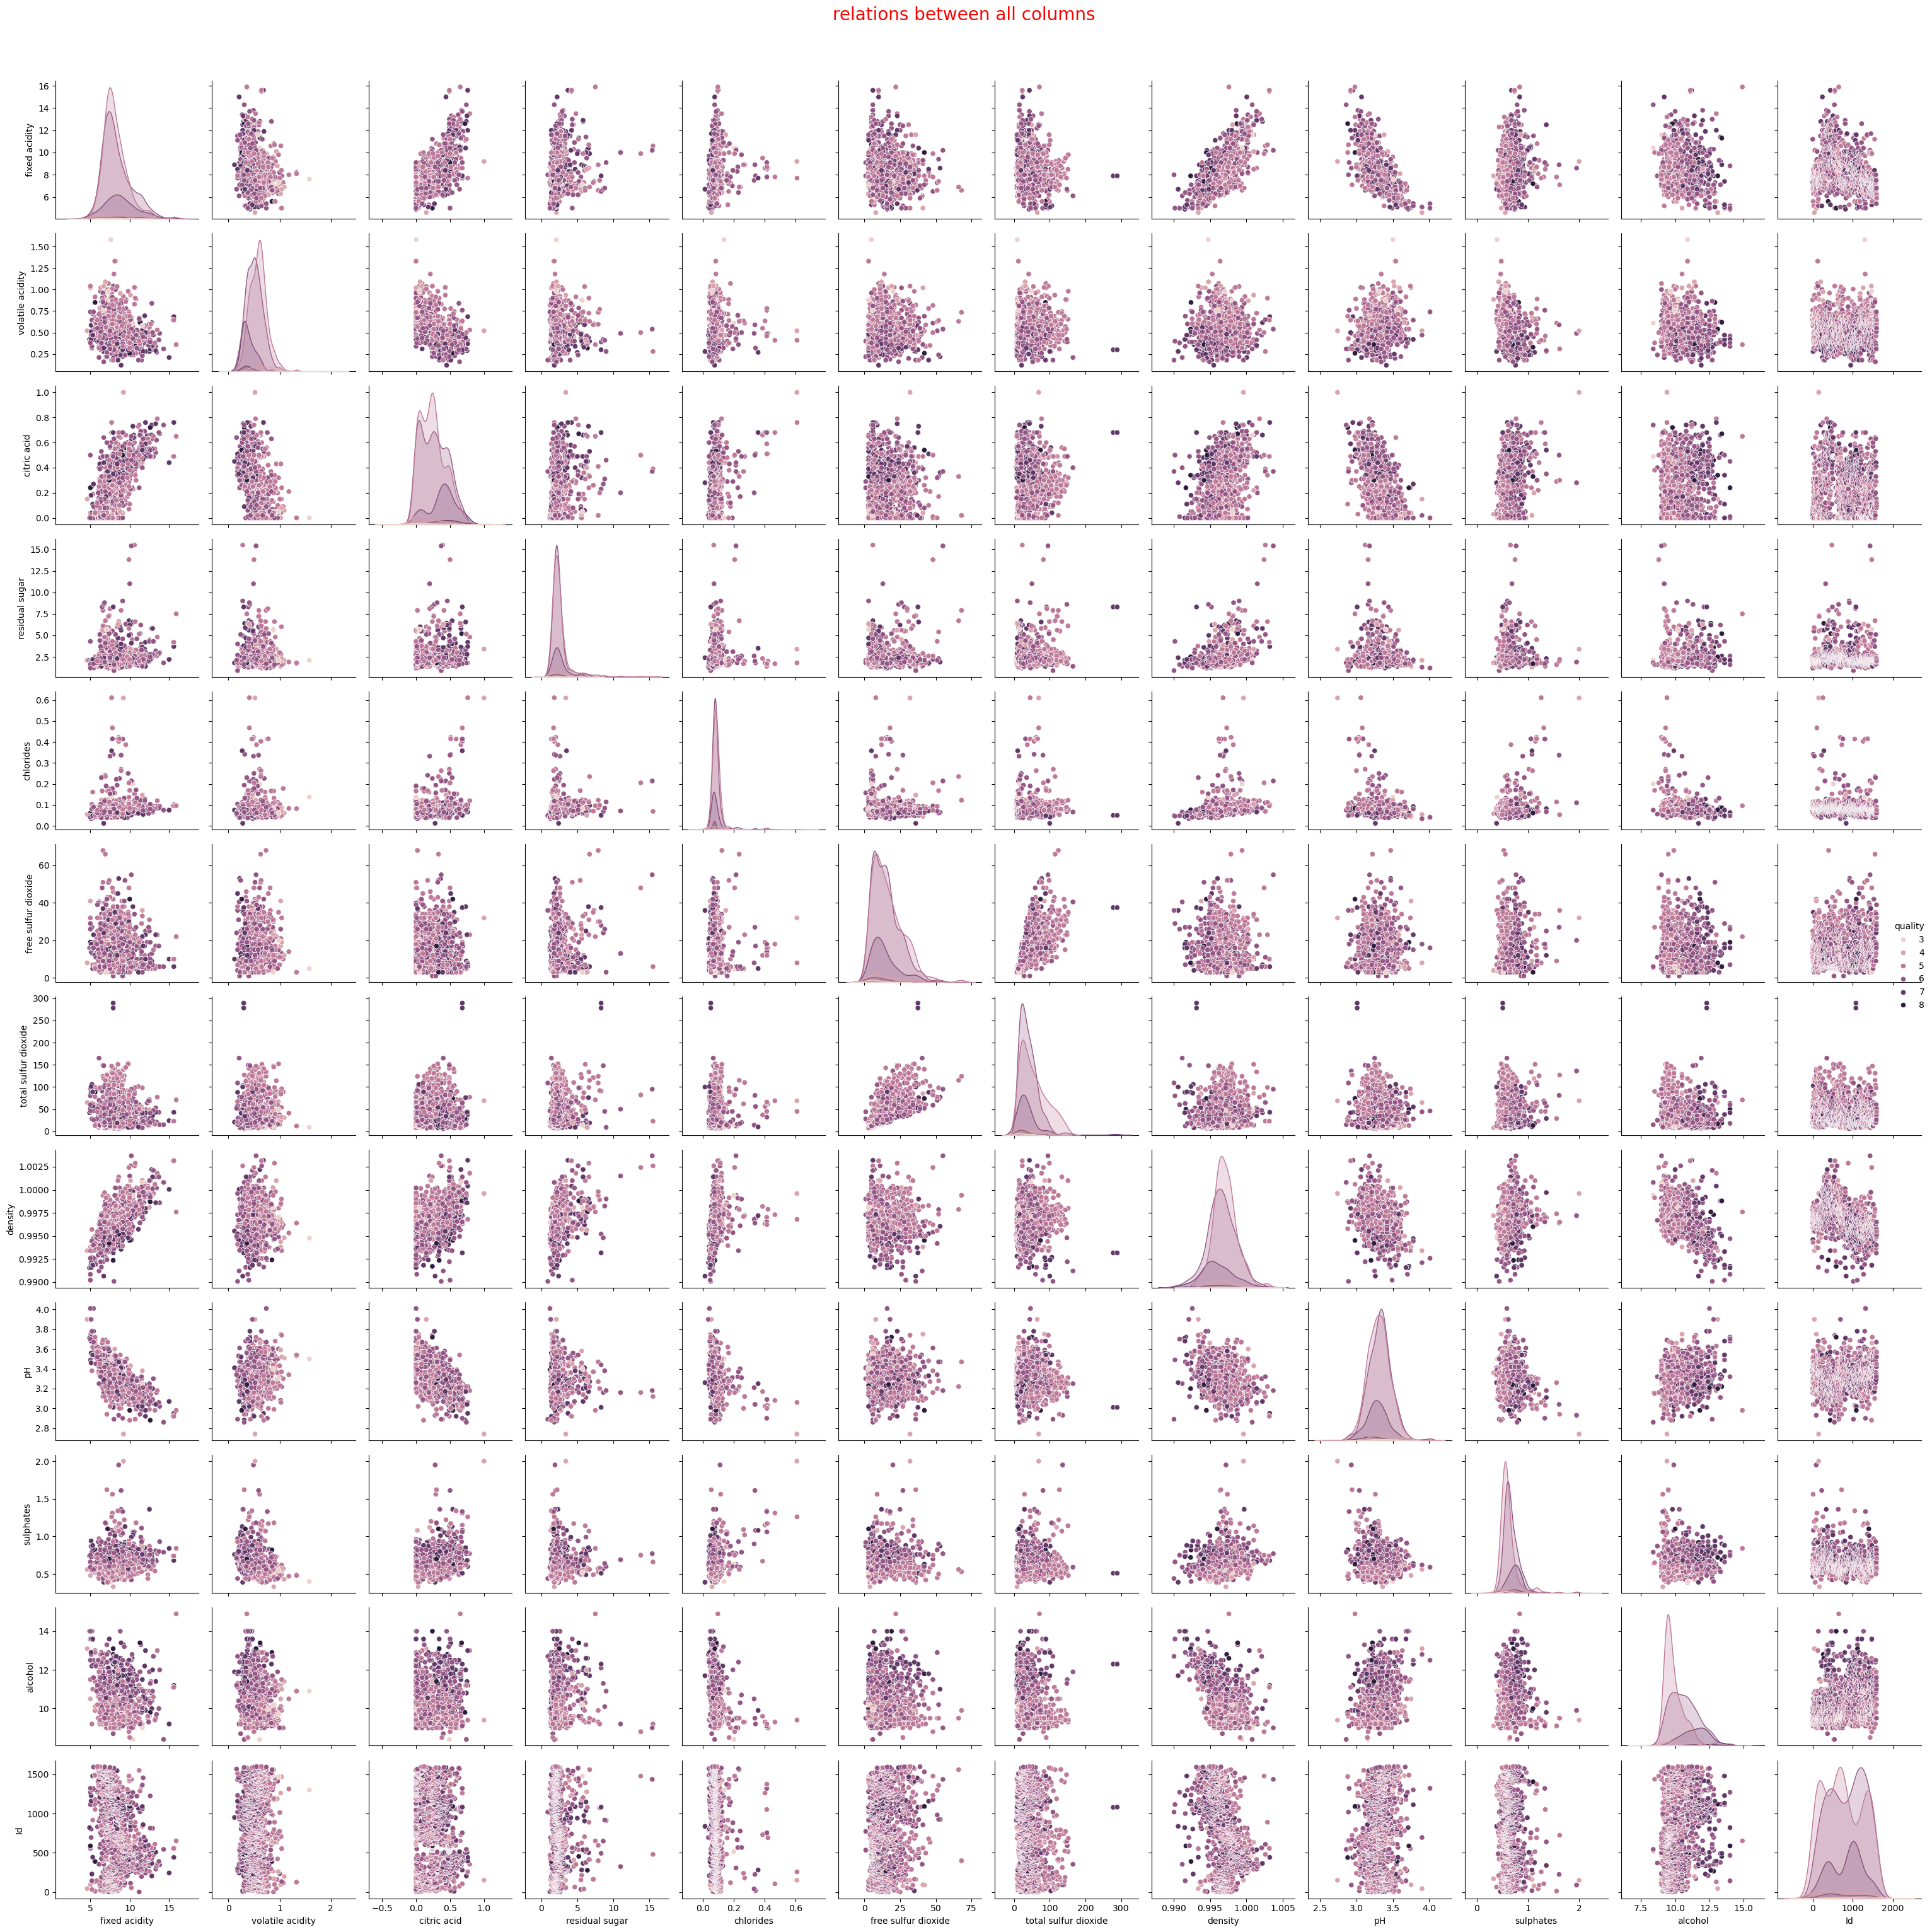

In [10]:
# we will use pairplot to see the relations between all columns
plt.figure(figsize=(30,30))
fig=sns.pairplot(data.select_dtypes(include=['float64','int64']),hue='quality')
fig.fig.suptitle("relations between all columns ", y=1.02,fontsize=20,color='red')
plt.tight_layout()

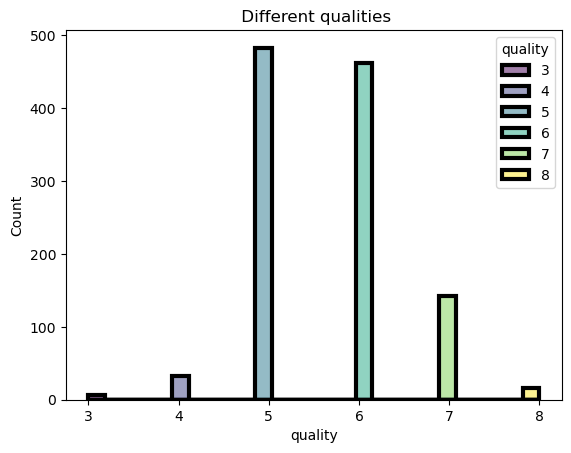

In [11]:
# since quality is our target ,we will draw to see the different values for each class.
sns.histplot(data=data,x='quality',edgecolor='black',hue='quality',linewidth=3,alpha=.5,palette='viridis')
plt.title(" Different qualities")
plt.show()

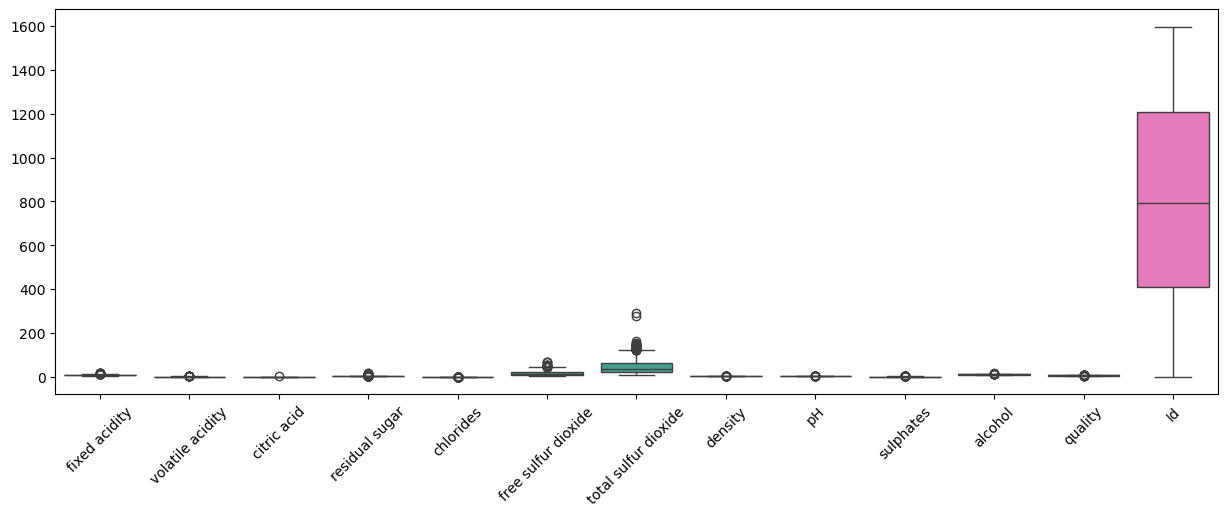

In [12]:
# we will see the outlier, but we don't handle it because this column doesn't have a strong relation with our target( no feature)
plt.figure(figsize=(15,5))
sns.boxplot(data)
plt.xticks(rotation=45)
plt.show()

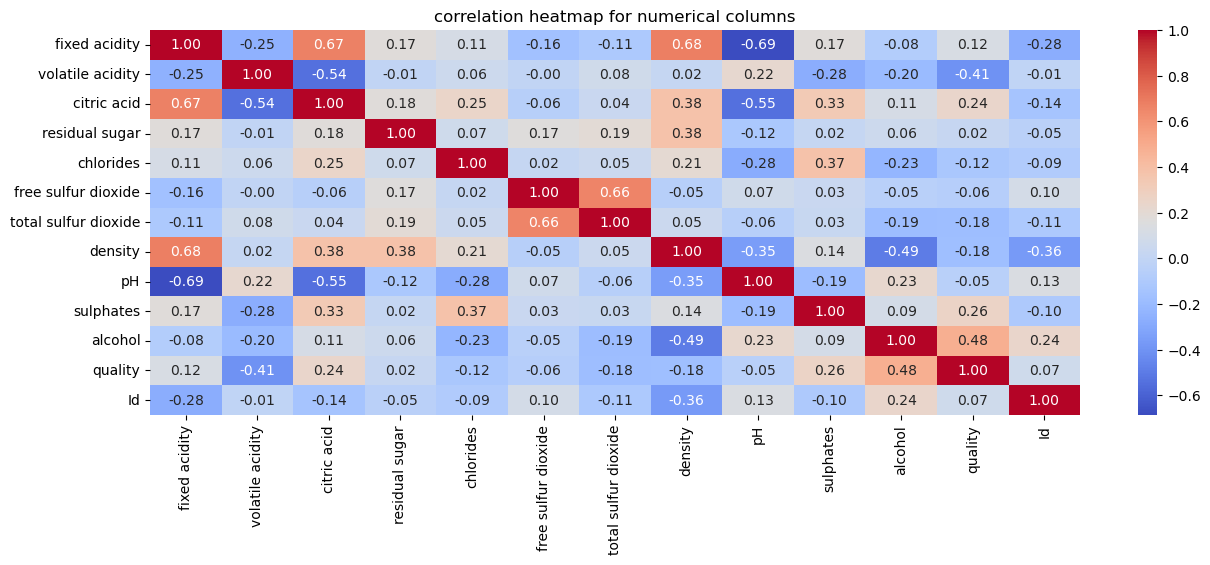

In [13]:
# we will use heatmap to see the features
plt.figure(figsize=(15,5))
sns.heatmap(data.select_dtypes(include=['float64','int64']).corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation heatmap for numerical columns')
plt.show()

<Figure size 3000x3000 with 0 Axes>

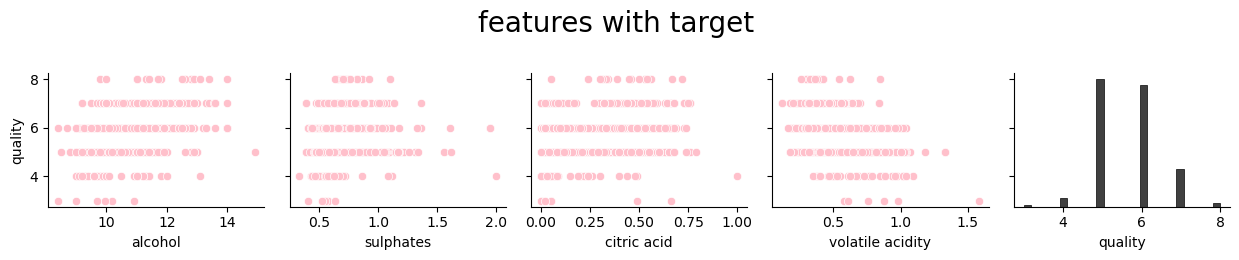

In [14]:
#we will see the relation between our target and columns that have a strongest correlation with it.
plt.figure(figsize=(30,30))
fig=sns.pairplot(data,x_vars=['alcohol','sulphates','citric acid','volatile acidity','quality'],y_vars=['quality'],plot_kws={'color':'pink'},
              diag_kws={'color':'black'}  )
fig.fig.suptitle("features with target ", y=1.02,fontsize=20,color='black')
plt.tight_layout()
plt.show()

In [15]:
# we will determinate the features and target
features=['alcohol','sulphates','citric acid','volatile acidity']
x=data[features]
y=data['quality']
x

alcohol  sulphates  citric acid  volatile acidity
0         9.4       0.56         0.00             0.700
1         9.8       0.68         0.00             0.880
2         9.8       0.65         0.04             0.760
3         9.8       0.58         0.56             0.280
4         9.4       0.56         0.00             0.700
...       ...        ...          ...               ...
1138     11.0       0.75         0.13             0.510
1139      9.5       0.82         0.08             0.620
1140     10.5       0.58         0.08             0.600
1141     11.2       0.76         0.10             0.550
1142     10.2       0.71         0.12             0.645

[1143 rows x 4 columns]

In [16]:
# we can notice that x need to normalize
scaler=MinMaxScaler(feature_range=(0,1))
x_scaler=scaler.fit_transform(x)
x_scaler     

array([[0.15384615, 0.13772455, 0.        , 0.39726027],
       [0.21538462, 0.20958084, 0.        , 0.52054795],
       [0.21538462, 0.19161677, 0.04      , 0.43835616],
       ...,
       [0.32307692, 0.1497006 , 0.08      , 0.32876712],
       [0.43076923, 0.25748503, 0.1       , 0.29452055],
       [0.27692308, 0.22754491, 0.12      , 0.35958904]])

In [17]:
# we will spilt data into 70% for training , 30% for test 
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.3,random_state=1,stratify=y)

In [18]:
# SVC
# with different kernals
#class_weight='balanced': since the data unbalanced
svm_models = {
"SVC (sigmoid) ": SVC(kernel='sigmoid',class_weight='balanced'),
"Linear SVM": SVC(kernel='linear',class_weight='balanced'),
"SVC (RBF kernel)": SVC(kernel='rbf',class_weight='balanced'),
"Polynomial SVM of 2": SVC(kernel='poly', degree=2,class_weight='balanced')
}

In [19]:
# we will fit each type and see the accuracy of train and test
for name,model in svm_models.items():
    mymodel=model
    mymodel.fit(x_train,y_train)
    y_pred = mymodel.predict(x_test)
    print(f" Accuracy of train : {accuracy_score(y_train, model.predict(x_train)):.4f}")
    print(f"{name} Accuracy for test: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred,zero_division=0))

 Accuracy of train : 0.1363
SVC (sigmoid)  Accuracy for test: 0.1399
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.28      0.28      0.28       145
           6       0.25      0.01      0.01       138
           7       0.13      0.14      0.13        43
           8       0.00      0.00      0.00         5

    accuracy                           0.14       343
   macro avg       0.11      0.07      0.07       343
weighted avg       0.24      0.14      0.14       343

 Accuracy of train : 0.2975
Linear SVM Accuracy for test: 0.2741
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.03      0.30      0.06        10
           5       0.62      0.46      0.53       145
           6       0.52      0.11      0.18       138
           7       0.14      0.12      0.12        4

In [20]:
# we can notice that SVC (RBF kernel) is the biggest (49%)
# now we will try poly with different degrees
for i in range (2,9,1):
     model=SVC(kernel='poly',degree=i,class_weight='balanced')
     model.fit(x_train,y_train)
     y_pred = model.predict(x_test)
     print(f" Accuracy of train : {accuracy_score(y_train, model.predict(x_train)):.4f}")
     print(f"Polynomial SVM of {i} has Accuracy for test: {accuracy_score(y_test, y_pred):.4f}")
     print(classification_report(y_test, y_pred))

 Accuracy of train : 0.4788
Polynomial SVM of 2 has Accuracy for test: 0.4548
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.08      0.30      0.12        10
           5       0.61      0.67      0.64       145
           6       0.57      0.28      0.37       138
           7       0.42      0.35      0.38        43
           8       0.08      0.60      0.14         5

    accuracy                           0.45       343
   macro avg       0.29      0.37      0.28       343
weighted avg       0.54      0.45      0.47       343

 Accuracy of train : 0.5062
Polynomial SVM of 3 has Accuracy for test: 0.4636
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.07      0.30      0.12        10
           5       0.59      0.70      0.64       145
           6       0.59      0.25      0.36       138
           7       0.46      0

In [21]:
# the best model svc (poly) with degree 6 (50%):
# we will fit only ,see its accuracy and draw confusion_matrix and heatmap.
model=SVC(kernel='poly',degree=6,class_weight='balanced')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f" Accuracy of train : {accuracy_score(y_train, model.predict(x_train)):.4f}")
print(f"Polynomial SVM of 6 has Accuracy for test: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

 Accuracy of train : 0.6250
Polynomial SVM of 6 has Accuracy for test: 0.5073
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.07      0.20      0.10        10
           5       0.56      0.80      0.66       145
           6       0.62      0.23      0.34       138
           7       0.61      0.53      0.57        43
           8       0.11      0.20      0.14         5

    accuracy                           0.51       343
   macro avg       0.33      0.33      0.30       343
weighted avg       0.56      0.51      0.49       343



In [22]:
confusion_matrix(y_test, y_pred)

array([[  0,   2,   0,   0,   0,   0],
       [  1,   2,   7,   0,   0,   0],
       [  3,  14, 116,   9,   2,   1],
       [  2,  11,  79,  32,  11,   3],
       [  0,   0,   7,   9,  23,   4],
       [  0,   0,   0,   2,   2,   1]], dtype=int64)

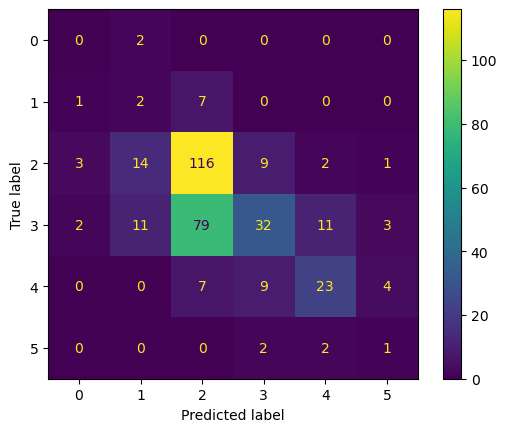

In [23]:
# we use ConfusionMatrixDisplay to see confusion_matrix in visual view.
d= ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
d.plot()
plt.show()

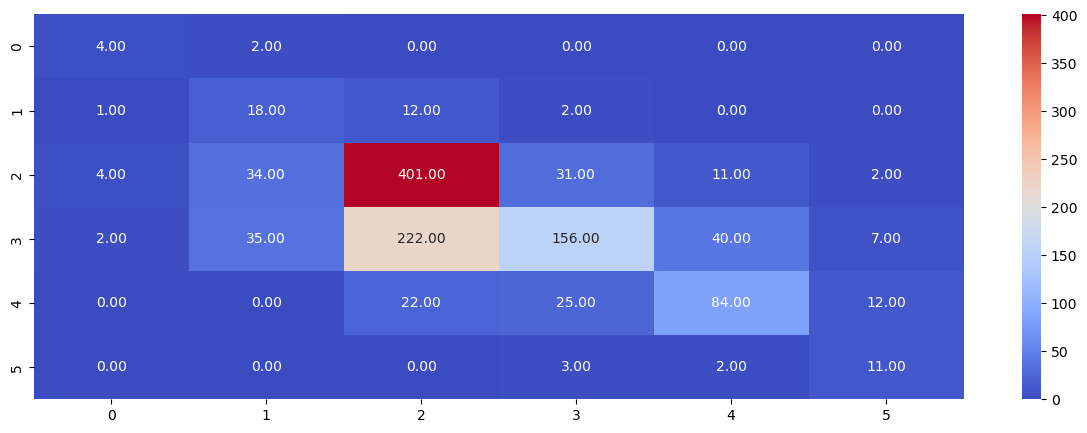

In [24]:
# we will draw heatmap that show true value and predict value for all data
pretotal=model.predict(x_scaler)
cs=confusion_matrix(y,pretotal)
plt.figure(figsize=(15,5))
sns.heatmap(cs,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [25]:
#neural network
#Define Parameter Grid for GridSearchCV
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Alpha Learning rate 
}

In [26]:
# GridSearchCV
grid_search = GridSearchCV(MLPClassifier(max_iter=10000), param_grid, cv=4, n_jobs=-1, verbose=2, scoring='accuracy')
# Train the model using GridSearchCV
grid_search.fit(x_train, y_train)
# Get the best alpha
print(f"\nBest Parameters: {grid_search.best_params_}")

Fitting 4 folds for each of 3 candidates, totalling 12 fits

Best Parameters: {'alpha': 0.0001}


In [27]:
# we will fit different forms of MLPClassifier ( i will change activation functions and hidden_layer)
aplha=grid_search.best_params_['alpha']
models = {
    "Simple1 with segomid function": MLPClassifier(hidden_layer_sizes=(256,), activation='logistic',
                                                   max_iter=3000, random_state=42, learning_rate_init=aplha,solver='adam'),
    "Simple2 with relu function": MLPClassifier(hidden_layer_sizes=(256,), activation='relu',
                                                max_iter=3000, random_state=42, learning_rate_init=aplha,solver='adam'),
    "Simple3 with tanh funcation": MLPClassifier(hidden_layer_sizes=(256,), activation='tanh', 
                                                 max_iter=3000, random_state=42, learning_rate_init=aplha,solver='adam'),
    "Deep1":  MLPClassifier(hidden_layer_sizes=(128, 128), activation='tanh',
                            max_iter=2000, random_state=42, learning_rate_init=aplha,solver='adam'),
    "Deep2":  MLPClassifier(hidden_layer_sizes=(256, 256, 128,128), activation='relu',
                            max_iter=3000, random_state=42, learning_rate_init=aplha,solver='adam'),
    "Deep3": MLPClassifier(hidden_layer_sizes=(256, 256, 265,128,128,100,100), activation='relu',
                            max_iter=3000, random_state=42, learning_rate_init=aplha,solver='adam')

}

In [28]:
# I will fit all and save results to display the best model
result={}
for name ,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    # Evaluate the model
    acc = accuracy_score(y_test, y_pred)
    result[name]=acc
    print(f" Accuracy of train : {accuracy_score(y_train, model.predict(x_train)):.4f}")
    print(f"{name} Accuracy of test : {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred,zero_division=0))
    cv_scores = cross_val_score(model, x_scaler, y, cv=5, scoring='accuracy')
    print(f"Cross-validation scores (5-fold): {cv_scores}")
    print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

 Accuracy of train : 0.5962
Simple1 with segomid function Accuracy of test : 0.5481
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.61      0.79      0.69       145
           6       0.48      0.52      0.50       138
           7       0.25      0.02      0.04        43
           8       0.00      0.00      0.00         5

    accuracy                           0.55       343
   macro avg       0.22      0.22      0.21       343
weighted avg       0.48      0.55      0.50       343

Cross-validation scores (5-fold): [0.54148472 0.56331878 0.62882096 0.57017544 0.59649123]
Mean cross-validation accuracy: 0.5801
 Accuracy of train : 0.5837
Simple2 with relu function Accuracy of test : 0.5831
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10

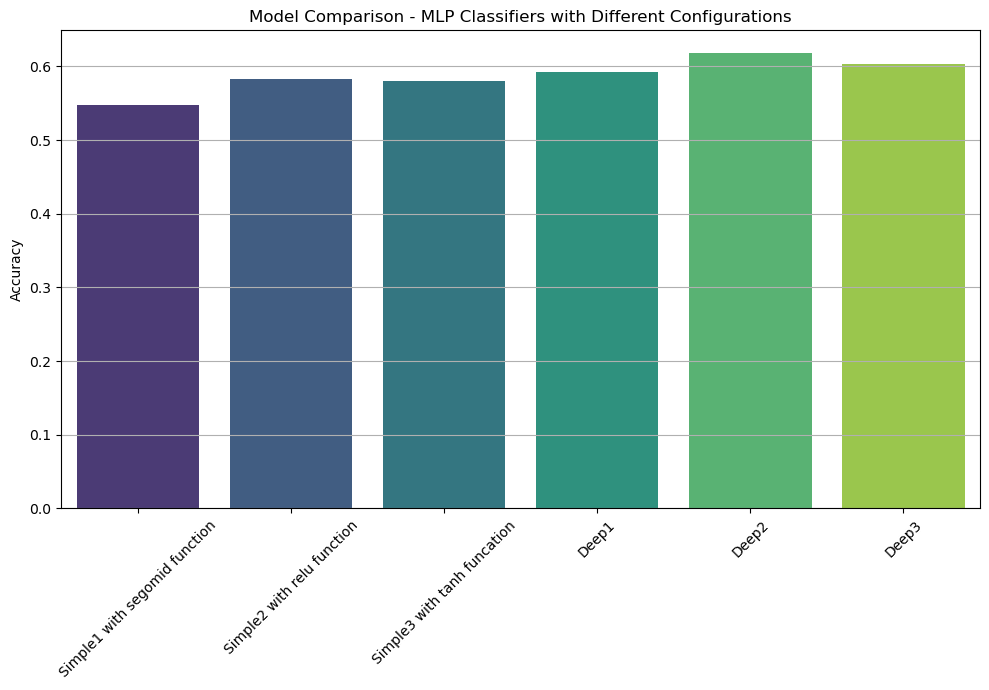

In [29]:
#(Deep2 Accuracy of test : 0.6181 ) the best until now.
#MLP Classifiers gives us a better result than svc
# we will compare between them
plt.figure(figsize=(10, 7))
sns.barplot(x=list(result.keys()), y=list(result.values()),hue=list(result.keys()), palette='viridis')
plt.ylabel("Accuracy")
plt.title("Model Comparison - MLP Classifiers with Different Configurations")
plt.xticks(rotation=45) 
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [30]:
# After all our models don't arrive to good accuracy (underfitting)
# the solution for underfitting to choose another model or change the values of hyperparameters
# we will use layers to solve this problem 
model=Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.3))
model.add(Dense(10, activation='softmax'))
optimize=Adam(learning_rate=.001,clipvalue=1.0)
model.compile(optimizer=optimize,loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,642 (272.04 KB)

 Trainable params: 69,642 (272.04 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    epochs=500, batch_size=8, verbose=1)

Epoch 1/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4567 - loss: 1.7354 - val_accuracy: 0.5625 - val_loss: 1.2225
Epoch 2/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5918 - loss: 1.1080 - val_accuracy: 0.5625 - val_loss: 1.1528
Epoch 3/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5548 - loss: 1.0808 - val_accuracy: 0.5875 - val_loss: 1.1183
Epoch 4/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5984 - loss: 0.9760 - val_accuracy: 0.5750 - val_loss: 1.1012
Epoch 5/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6170 - loss: 1.0097 - val_accuracy: 0.5500 - val_loss: 1.1298
Epoch 6/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5936 - loss: 0.9993 - val_accuracy: 0.5000 - val_loss: 1.1360
Epoch 7/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5720 - loss: 0.9672 - val_accuracy: 0.5875 - val_loss: 1.1023
Epoch 8/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5793 - loss: 1.0002 - val_accuracy: 0.5750 - v

In [32]:
# when we use different complex layers the accuracy become low .
# we still have underfitting
# overfitting already happened when i use more layers
# I delete layers and use dropout layer to avoid over fitting
y_pred_probs = model.predict(x_train)
y_pred = np.argmax(y_pred_probs, axis=1)
print(f" Accuracy of train : {accuracy_score(y_train, y_pred):.4f}")
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print(f" Accuracy of test : {accuracy_score(y_test, y_pred):.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
 Accuracy of train : 0.7875
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
 Accuracy of test : 0.6064


In [33]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   1,   1,   0,   0],
       [  0,   1,   7,   2,   0,   0],
       [  0,   2, 104,  39,   0,   0],
       [  0,   3,  48,  83,   4,   0],
       [  0,   0,   1,  21,  20,   1],
       [  0,   0,   0,   2,   3,   0]], dtype=int64)

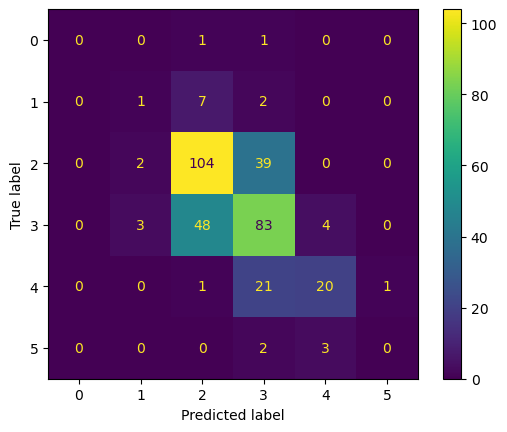

In [34]:
# we use ConfusionMatrixDisplay to see confusion_matrix in visual view.
d= ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
d.plot()
plt.show()

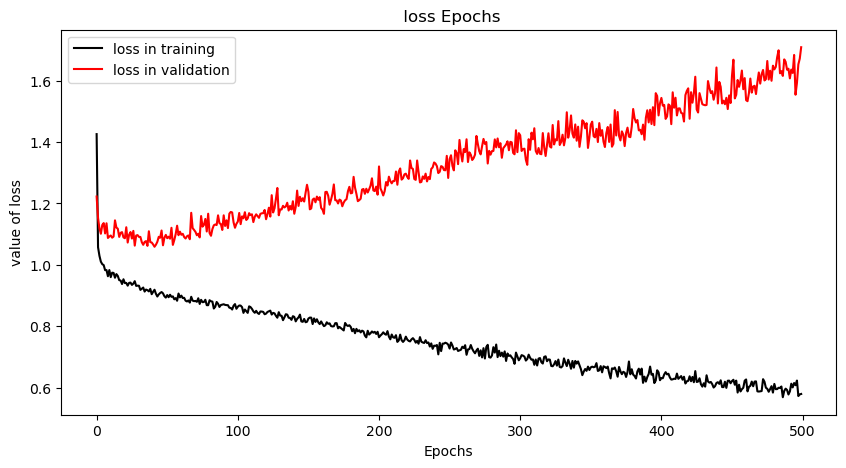

In [35]:
# I draw the loss in traing with loss in validation 
# we can notice loss in traing decreses ,but loss in validation increases (overfitting)
# they meet in the earliest Epochs ,but in this point we will have underfitting
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'],color='black',label='loss in training')
plt.plot(history.history['val_loss'],color='red',label='loss in validation')
plt.title(' loss Epochs')
plt.xlabel('Epochs')
plt.ylabel('value of loss')
plt.legend()
plt.savefig('loss Epochs.png')
plt.show()

In [36]:
# After all this : the best accuracy (61%)
# Now : we will try another way to solve this problem
# the problem is that the data is unbalanced
# we will use SMOTE to make the data balanced
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', k_neighbors=2)
x_balance,y_balance=smote.fit_resample(x_scaler,y)
y_balance.value_counts() 

quality
5    483
6    483
7    483
4    483
8    483
3    483
Name: count, dtype: int64

In [37]:
# we will spilt balanced data into 70% for training , 30% for test 
x_train,x_test,y_train,y_test=train_test_split(x_balance,y_balance,test_size=0.3,random_state=1)

In [38]:
# now i will use different models of classification to fit new balanced data and compare between them.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
allmodels = {
"SVC (RBF kernel)": SVC(kernel='rbf'),
"Linear SVM": SVC(kernel='linear'),
"Polynomial SVM of 2": SVC(kernel='poly', degree=2),
"GaussianNB": GaussianNB(),
'KNN with 3 k':KNeighborsClassifier(n_neighbors=3),
'KNN with 4 k':KNeighborsClassifier(n_neighbors=4),
'Logistic':LogisticRegression(),
'random forest ':RandomForestClassifier(n_estimators=50,max_depth=14,random_state=1),
'sample neural': MLPClassifier(hidden_layer_sizes=(256,350), activation='relu',
                               max_iter=2000, random_state=42, learning_rate_init=.01,solver='adam'),
    }

In [39]:
result={}
# we will fit 6  different models
for name ,model in allmodels.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    result[name]=acc
    print(f"Accuracy of train : {accuracy_score(y_train, model.predict(x_train)):.4f}")
    print(f"{name} Accuracy of test : {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred,zero_division=0))

Accuracy of train : 0.6386
SVC (RBF kernel) Accuracy of test : 0.6149
              precision    recall  f1-score   support

           3       0.76      0.92      0.84       159
           4       0.85      0.30      0.44       148
           5       0.45      0.69      0.55       145
           6       0.39      0.34      0.36       147
           7       0.73      0.49      0.58       136
           8       0.69      0.95      0.80       135

    accuracy                           0.61       870
   macro avg       0.64      0.61      0.59       870
weighted avg       0.65      0.61      0.60       870

Accuracy of train : 0.4458
Linear SVM Accuracy of test : 0.4391
              precision    recall  f1-score   support

           3       0.59      0.75      0.66       159
           4       0.34      0.30      0.32       148
           5       0.42      0.44      0.43       145
           6       0.46      0.26      0.33       147
           7       0.27      0.29      0.28       13

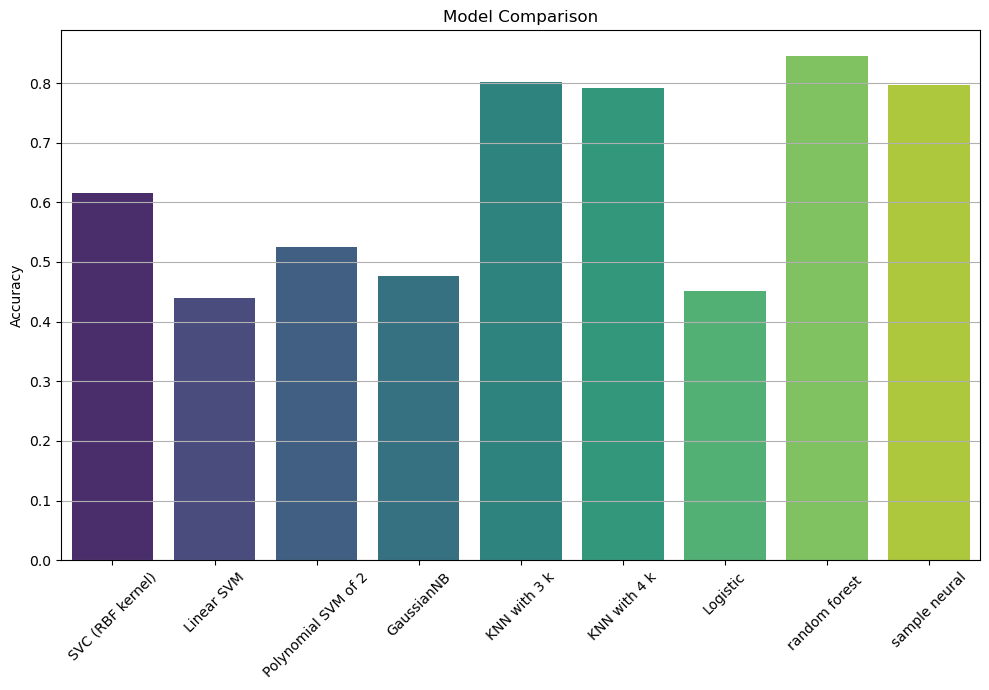

In [40]:
# knn with 3k,sample neural and randomforest have a best accuracy
#Accuracy of train : 0.9995
#random forest  Accuracy of test : 0.846
# Also accuracy of train is near to 1 ,but accuracy of test is good (84%)
# we will draw to compare between different models
plt.figure(figsize=(10, 7))
sns.barplot(x=list(result.keys()), y=list(result.values()),hue=list(result.keys()), palette='viridis')
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=45) 
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [41]:
# finally ,we will fit randomforest 
model=RandomForestClassifier(n_estimators=50,max_depth=14,random_state=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of train : {accuracy_score(y_train, model.predict(x_train)):.4f}")
print(f"Accuracy of test : {accuracy_score(y_test, y_pred):.4f}")

Accuracy of train : 0.9990
Accuracy of test : 0.8460


In [42]:
confusion_matrix(y_test, y_pred)

array([[159,   0,   0,   0,   0,   0],
       [  0, 143,   2,   3,   0,   0],
       [  1,   9, 106,  25,   2,   2],
       [  0,  10,  49,  72,  14,   2],
       [  0,   0,   0,   9, 123,   4],
       [  0,   0,   0,   0,   2, 133]], dtype=int64)

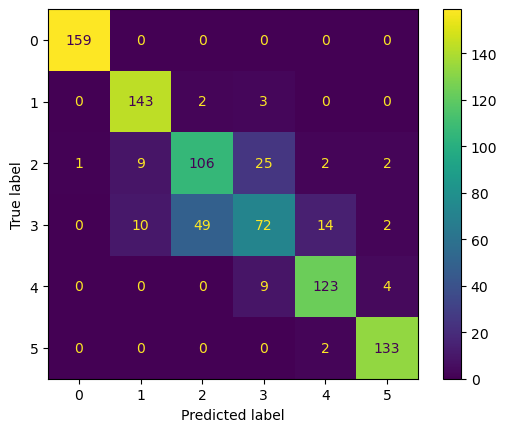

In [43]:
# we use ConfusionMatrixDisplay to see confusion_matrix in visual view.
d= ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
d.plot()
plt.show()

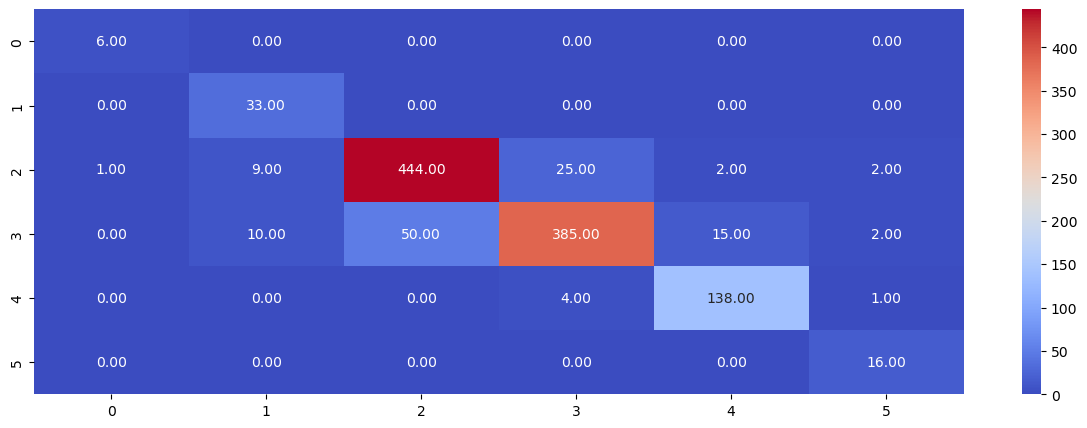

In [44]:
# we will draw heatmap that show true value and predict value for all data
pretotal=model.predict(x_scaler)
cs=confusion_matrix(y,pretotal)
plt.figure(figsize=(15,5))
sns.heatmap(cs,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()